In [1]:
from shapely import Point , LineString , LinearRing , Polygon
from shapely import MultiPoint , MultiLineString , MultiPolygon

# object.interpolate(distance[, normalized=False])

### 返回一个沿线性几何对象的指定距离的点。如果normalized参数为True，距离将被解释为几何对象长度的一部分。

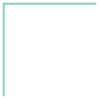

In [2]:
line = LineString([(0, 0), (0, 1), (1, 1)])
line

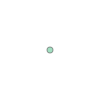

In [3]:
point1 = line.interpolate(0.75)
point1

In [4]:
list(point1.coords)

[(0.0, 0.75)]

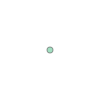

In [5]:
point2 = line.interpolate(0.75 , normalized=True)
point2

In [6]:
list(point2.coords) # 1.5 / 2 = 0.75

[(0.5, 1.0)]

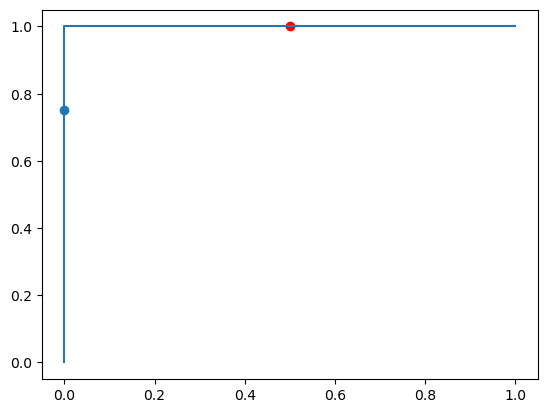

In [7]:
import matplotlib.pyplot as plt

plt.plot([0,0,1] , [0,1,1])
plt.scatter(point1.x , point1.y)
plt.scatter(point2.x , point2.y , color="red")

# object.project(other[, normalized=False])

### 返回沿该几何对象到最接近另一个对象的点的距离。如果normalized参数为True，返回对象长度的标准化距离。project()方法是interpolate()的逆运算。

In [8]:
line.project(point1)

0.75

In [9]:
line.project(point1, normalized=True)

0.375

In [10]:
line.project(point2, normalized=True)

0.75

# 线性参考方法可以被用来按指定的距离分割线。

In [11]:
def cut(line, distance):
    # 将一条线从起点处一分为二
    if distance <= 0.0 or distance >= line.length:
        return [LineString(line)]
    coords = list(line.coords)
    for i, p in enumerate(coords):
        pd = line.project(Point(p)) # 返回该点（组成线的点）与线段起点间的距离
        if pd == distance:
            return [
                LineString(coords[:i+1]),
                LineString(coords[i:])]
        if pd > distance:
            cp = line.interpolate(distance) # 沿线段指定距离的点
            return [
                LineString(coords[:i] + [(cp.x, cp.y)]),
                LineString([(cp.x, cp.y)] + coords[i:])]

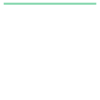

In [12]:
line = LineString([(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0)])
line

In [13]:
[list(x.coords) for x in cut(line, 0.5)]

[[(0.0, 0.0), (0.5, 0.0)],
 [(0.5, 0.0), (1.0, 0.0), (2.0, 0.0), (3.0, 0.0), (4.0, 0.0), (5.0, 0.0)]]

In [14]:
[list(x.coords) for x in cut(line, 1.0)]

[[(0.0, 0.0), (1.0, 0.0)],
 [(1.0, 0.0), (2.0, 0.0), (3.0, 0.0), (4.0, 0.0), (5.0, 0.0)]]

In [15]:
[list(x.coords) for x in cut(line, 2.5)]

[[(0.0, 0.0), (1.0, 0.0), (2.0, 0.0), (2.5, 0.0)],
 [(2.5, 0.0), (3.0, 0.0), (4.0, 0.0), (5.0, 0.0)]]